# DEFINE PROBLEM

- According to the Federal Reserve economic data, the default rate on credit loans across all commercial banks is at an all-time high for the past 66 months, and it is likely to continue to climb throughout 2020 
    - Source : https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/2722631/Alam.pdf?sequence=4

# DEFINE GOALS

- Help bank to create strategy preventing customers default by understanding customers behaviour through customes default prediction
- Find out which features/columns affecting customers to default
- This research will be utilized to created customers credit card default prediction Machine Learning Model  
- Minimize False Negative prediction in Machine Learning Model => Have more business losses if we predict customer not default but in actual is default

### IMPORT COMMON PACKAGE

In [1]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dython
from dython.nominal import associations, cramers_v, correlation_ratio, theils_u
import dateparser
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 999

### IMPORT FILE

In [2]:
df = pd.read_excel('CreditCard.xls')

### DATA TYPE OVERALL CHECK

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df.rename(columns=df.iloc[0], inplace=True)

In [5]:
df.drop([0], inplace=True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


##### COLUMNS DESCRIPTION
Source : PDF FILE

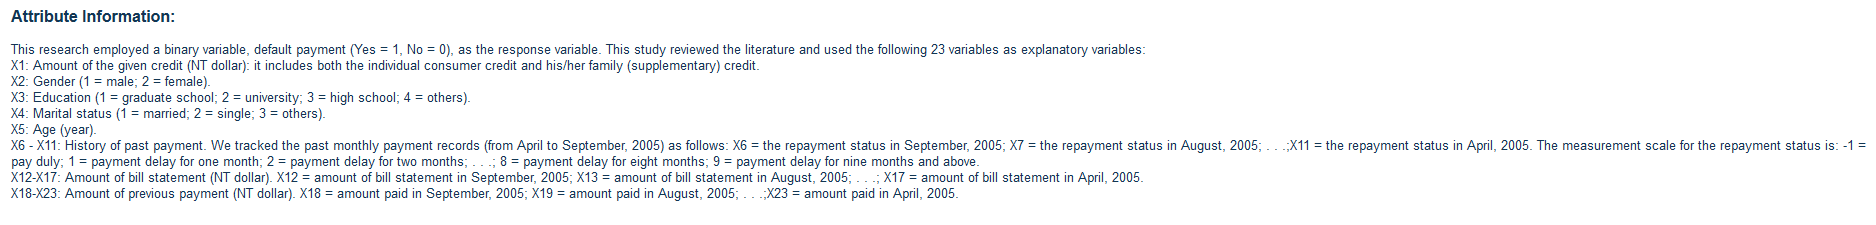

In [7]:
Image('CreditCard.png')

In [8]:
print(df.shape)

(30000, 25)


### COLUMN SUMMARY

In [9]:
dfDesc = []
for i in df.columns:
    dfDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum()/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [10]:
pd.DataFrame(data = dfDesc,
             columns = [
                 'Features', 
                 'DataType', 
                 'Null', 
                 'NullPercentage', 
                 'Unique', 
                 'Unique Sample'
             ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,ID,object,0,0.00,30000,"[6711, 18921]"
1,LIMIT_BAL,object,0,0.00,81,"[260000, 620000]"
2,SEX,object,0,0.00,2,"[1, 2]"
3,EDUCATION,object,0,0.00,7,"[4, 3]"
4,MARRIAGE,object,0,0.00,4,"[2, 0]"
5,AGE,object,0,0.00,56,"[22, 34]"
6,PAY_0,object,0,0.00,11,"[-1, -2]"
7,PAY_2,object,0,0.00,11,"[6, 4]"
8,PAY_3,object,0,0.00,11,"[8, 3]"
9,PAY_4,object,0,0.00,11,"[-1, 6]"


- df.head(), df.shape, dfDesc are utilized to capture dataset genereal information

====================================================================================================================

## DATA PREPARATION & HANDLING MISSING VALUE CHECKING

In [11]:
df.isna().sum()
## From information above, dataset don't have missing value

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

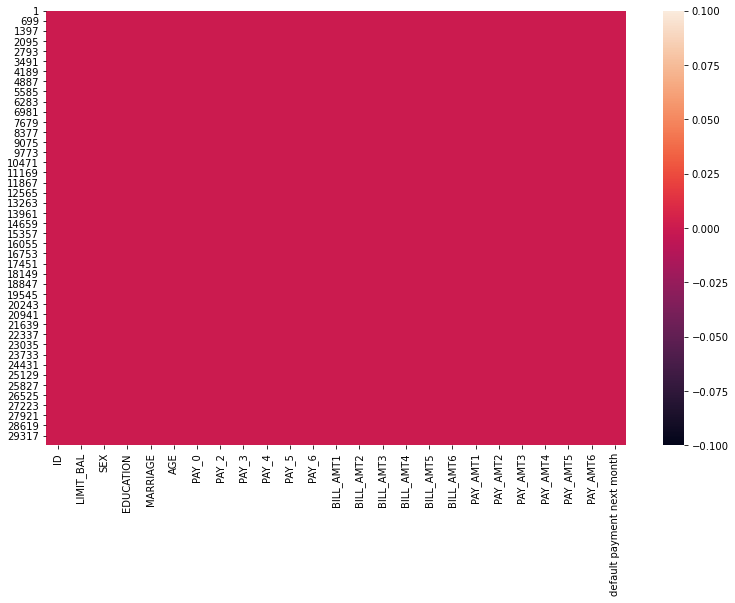

In [12]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna())
plt.show()

In [13]:
df = df.rename(columns={'default payment next month': 'def_pay'})

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df.dtypes
# LIMIT_BAL, AGE, BILL_AMT1 - BiLL_AMT6, PAY_AMT1 - PAY_AMT6 has to change into integer

ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
def_pay      object
dtype: object

In [16]:
df = df.astype('int')

In [17]:
# df['LIMIT_BAL'] = df['LIMIT_BAL'].astype('int')
# df['AGE'] = df['AGE'].astype('int')
# df['BILL_AMT1'] = df['BILL_AMT1'].astype('int')
# df['BILL_AMT1'] = df['BILL_AMT1'].astype('int')
# df['BILL_AMT2'] = df['BILL_AMT2'].astype('int')
# df['BILL_AMT3'] = df['BILL_AMT3'].astype('int')
# df['BILL_AMT4'] = df['BILL_AMT4'].astype('int')
# df['BILL_AMT5'] = df['BILL_AMT5'].astype('int')
# df['BILL_AMT6'] = df['BILL_AMT6'].astype('int')
# df['PAY_AMT1'] = df['PAY_AMT1'].astype('int')
# df['PAY_AMT2'] = df['PAY_AMT2'].astype('int')
# df['PAY_AMT3'] = df['PAY_AMT3'].astype('int')
# df['PAY_AMT4'] = df['PAY_AMT4'].astype('int')
# df['PAY_AMT5'] = df['PAY_AMT5'].astype('int')
# df['PAY_AMT6'] = df['PAY_AMT6'].astype('int')

In [18]:
df.dtypes

ID           int32
LIMIT_BAL    int32
SEX          int32
EDUCATION    int32
MARRIAGE     int32
AGE          int32
PAY_0        int32
PAY_2        int32
PAY_3        int32
PAY_4        int32
PAY_5        int32
PAY_6        int32
BILL_AMT1    int32
BILL_AMT2    int32
BILL_AMT3    int32
BILL_AMT4    int32
BILL_AMT5    int32
BILL_AMT6    int32
PAY_AMT1     int32
PAY_AMT2     int32
PAY_AMT3     int32
PAY_AMT4     int32
PAY_AMT5     int32
PAY_AMT6     int32
def_pay      int32
dtype: object

===========================================================================================================================

# DESCRIPTIVE ANALYSIS AND HANDLING OUTLIERS

### DESCRIPTIVE ANALYSIS

In [19]:
df_int = df.drop(columns = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'def_pay'])

In [20]:
# Numeric Columns
round(df_int.describe(),2)
# The youngest customer's age is 21, The oldest customer's age is 79, while average customer's age is 35
# The Lowest customer's limit balance is $10000, the highest customer's limit balance is $1000000, while average customer's balance is $167484
# The Lowest customer's balance is $10000, the highest customer's limit balance is $1000000, while average customer's balance is $167484

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,35.49,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50
std,129747.66,9.22,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47
min,10000.00,21.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,28.00,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75
50%,140000.00,34.00,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
75%,240000.00,41.00,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00
max,1000000.00,79.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00


In [21]:
df[['SEX','EDUCATION','MARRIAGE']].describe()
# Most customer's SEX are female
# Most customer's EDUCATION are University
# Most customer's MARRIAGE STATUS are single

,SEX,EDUCATION,MARRIAGE
count,30000.00,30000.00,30000.00
mean,1.60,1.85,1.55
std,0.49,0.79,0.52
min,1.00,0.00,0.00
25%,1.00,1.00,1.00
50%,2.00,2.00,2.00
75%,2.00,2.00,2.00
max,2.00,6.00,3.00


### OUTLIERS CHECK & HANDLING

In [22]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [23]:
# function to get unique values
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            
    return unique_list

In [24]:
outliers = []
cek_outlier(df['LIMIT_BAL'])
print(len(outliers))
print(unique(outliers))
## There are 167 Outliers of LIMIT_BAL
## Since the data is needed, Age outliers will not be removed

167
[630000, 580000, 600000, 620000, 610000, 700000, 670000, 680000, 550000, 540000, 1000000, 530000, 710000, 560000, 750000, 640000, 570000, 590000, 660000, 720000, 740000, 800000, 760000, 690000, 650000, 780000, 730000]


In [25]:
outliers = []
cek_outlier(df['AGE'])
print(len(outliers))
print(unique(outliers))
## There are 272 customers which AGE are outliers
## Since the data is needed, Balance outliers will not be removed

272
[63, 75, 61, 73, 67, 66, 62, 70, 72, 64, 65, 71, 69, 68, 79, 74]


In [26]:
outliers = []
cek_outlier(df['BILL_AMT1'])
print(len(outliers))
# print(unique(outliers))
## There are 2400 customers which BILL_AMT1 are outliers
## Since the data is needed, Balance outliers will not be removed

2400


In [27]:
outliers = []
cek_outlier(df['BILL_AMT2'])
print(len(outliers))
# print(unique(outliers))
## There are 2395 customers which BILL_AMT2 are outliers
## Since the data is needed, NoOfContacts outliers will not be removed

2395


In [28]:
outliers = []
cek_outlier(df['BILL_AMT3'])
print(len(outliers))
# print(unique(outliers))
## There are 2469 customers which DaysPassed are outliers
## Since the data is needed, DaysPassed outliers will not be removed

2469


In [29]:
outliers = []
cek_outlier(df['BILL_AMT4'])
print(len(outliers))
# print(unique(outliers))
## There are 2622 customers which BILL_AMT4 are outliers
## Since the data is needed, PrevAttempts outliers will not be removed

2622


In [30]:
outliers = []
cek_outlier(df['BILL_AMT5'])
print(len(outliers))
# print(unique(outliers))
## There are 2725 customers which BILL_AMT5 are outliers
## Since the data is needed, CallDuration outliers will not be removed

2725


In [31]:
outliers = []
cek_outlier(df['BILL_AMT6'])
print(len(outliers))
# print(unique(outliers))
## There are 2693 customers which BILL_AMT6 are outliers
## Since the data is needed, CallDuration outliers will not be removed

2693


In [32]:
outliers = []
cek_outlier(df['PAY_AMT1'])
print(len(outliers))
# print(unique(outliers))
## There are 2745 customers which PAY_AMT1 are outliers
## Since the data is needed, CallDuration outliers will not be removed

2745


In [33]:
outliers = []
cek_outlier(df['PAY_AMT2'])
print(len(outliers))
# print(unique(outliers))
## There are 2714 customers which PAY_AMT2 are outliers
## Since the data is needed, CallDuration outliers will not be removed

2714


In [34]:
outliers = []
cek_outlier(df['PAY_AMT3'])
print(len(outliers))
# print(unique(outliers))
## There are 2598 customers which PAY_AMT3 are outliers
## Since the data is needed, CallDuration outliers will not be removed

2598


In [35]:
outliers = []
cek_outlier(df['PAY_AMT4'])
print(len(outliers))
# print(unique(outliers))
## There are 2944 customers which PAY_AMT4 are outliers
## Since the data is needed, CallDuration outliers will not be removed

2994


In [36]:
outliers = []
cek_outlier(df['PAY_AMT5'])
print(len(outliers))
# print(unique(outliers))
## There are 2945 customers which PAY_AMT5 are outliers
## Since the data is needed, CallDuration outliers will not be removed

2945


In [37]:
outliers = []
cek_outlier(df['PAY_AMT6'])
print(len(outliers))
# print(unique(outliers))
## There are 2958 customers which PAY_AMT6 are outliers
## Since the data is needed, CallDuration outliers will not be removed

2958


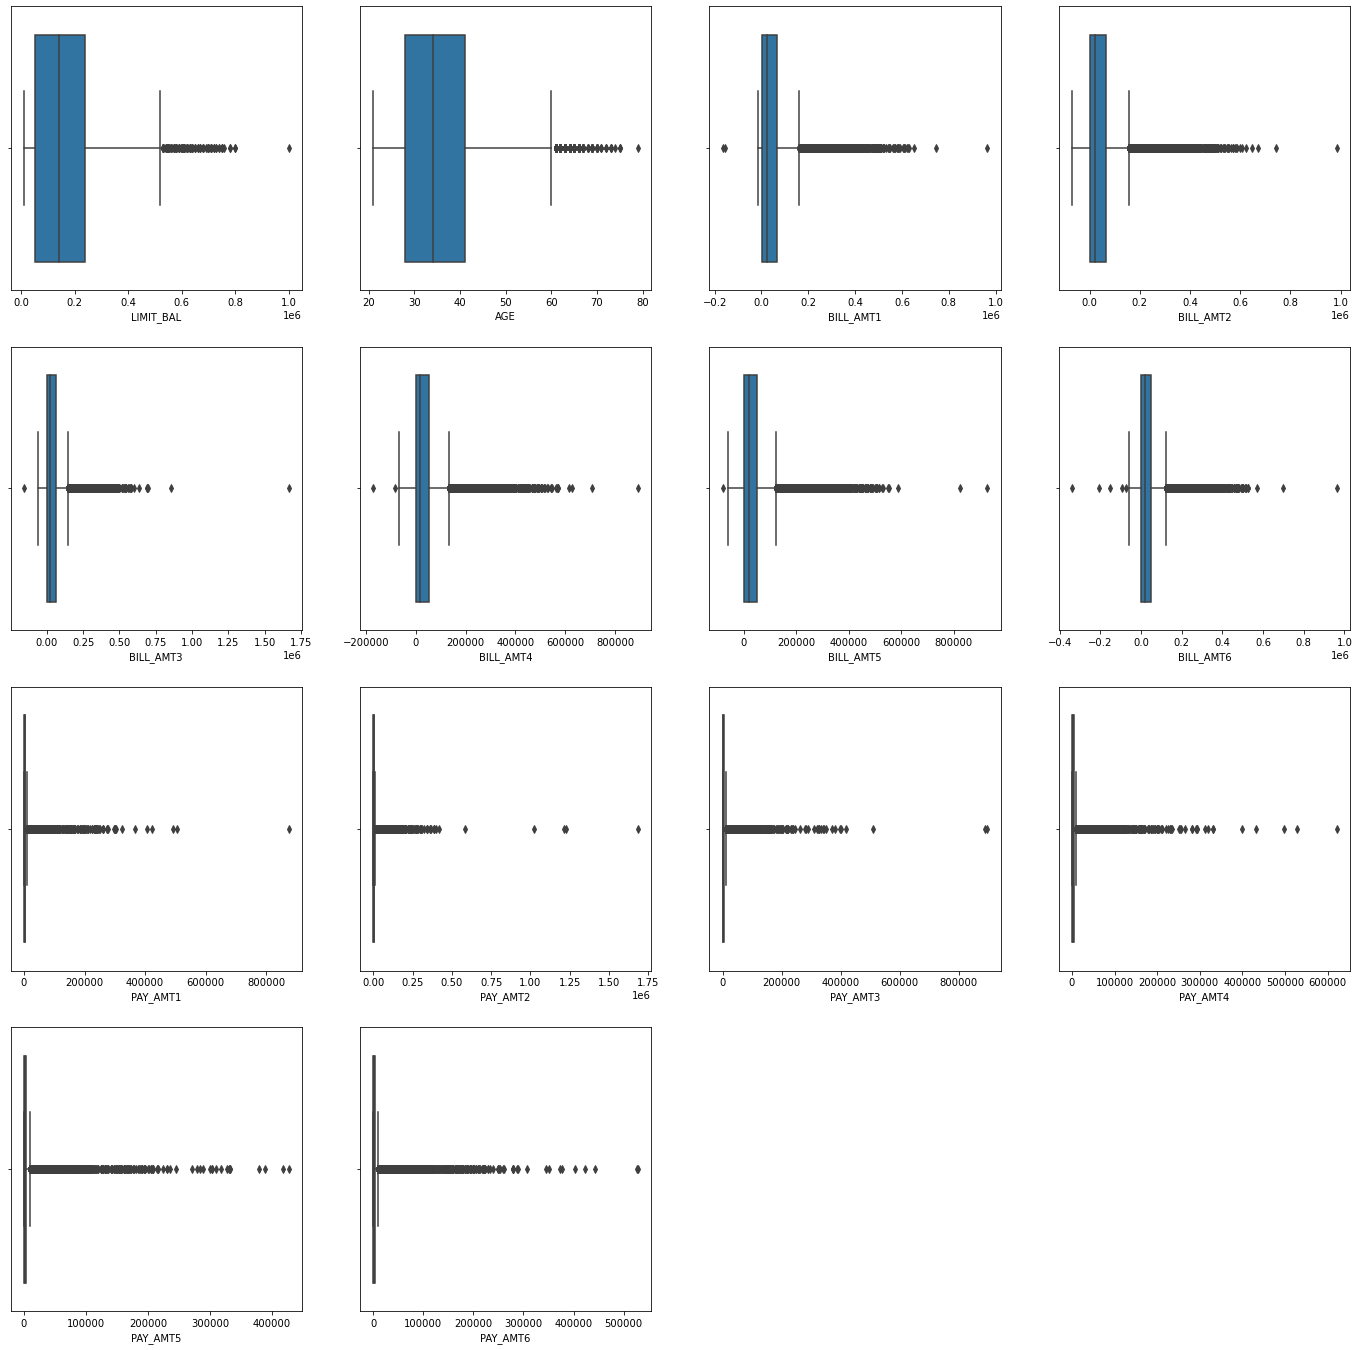

In [38]:
## Plot Boxplot For Numerical Columns to show distribution data & outliers value
df_outliers = df.drop(columns = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'def_pay'])

plt.figure(figsize =(24, 24))
x = 1 

for column in df_outliers.columns:
    plt.subplot(4,4,x)
    sns.boxplot(df_outliers[column])
    x+=1
    
plt.show()

 - This outliers will not be removed since it might be useful 

# DATA PREPARATION - FEATURES ENGINEERING

In [39]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### FEATURES ENGINEERING FOR EDA

- Encoding SEX
- Encoding EDUCATION
- Encoding MARRIAGE
- Binning Age

#### Encode SEX

In [40]:
df['SEX_CAT'] = df['SEX'].map({ 1 : 'Male', 2 : 'Female' })

#### Encode EDUCATION

In [41]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [42]:
df['EDUCATION'].value_counts(normalize=True)
# 0, 5, 6 have small percentage => we will add it into 4 (others)

2   0.47
1   0.35
3   0.16
5   0.01
4   0.00
6   0.00
0   0.00
Name: EDUCATION, dtype: float64

In [43]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [44]:
df['EDUCATION_CAT'] = df['EDUCATION'].map({ 1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others', 0 :'Others', 5:'Others', 6:'Others' })

#### Encode MARRIAGE

In [45]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [46]:
df['MARRIAGE'].value_counts(normalize=True)
## 0 and 4 have very small percentage => we will add it into 3

2   0.53
1   0.46
3   0.01
0   0.00
Name: MARRIAGE, dtype: float64

In [47]:
df['MARRIAGE_CAT'] = df['MARRIAGE'].map({ 1 : 'Married', 2 : 'Single', 3: 'Others', 0:'Others', 4:'Others'})

#### Binning AGE

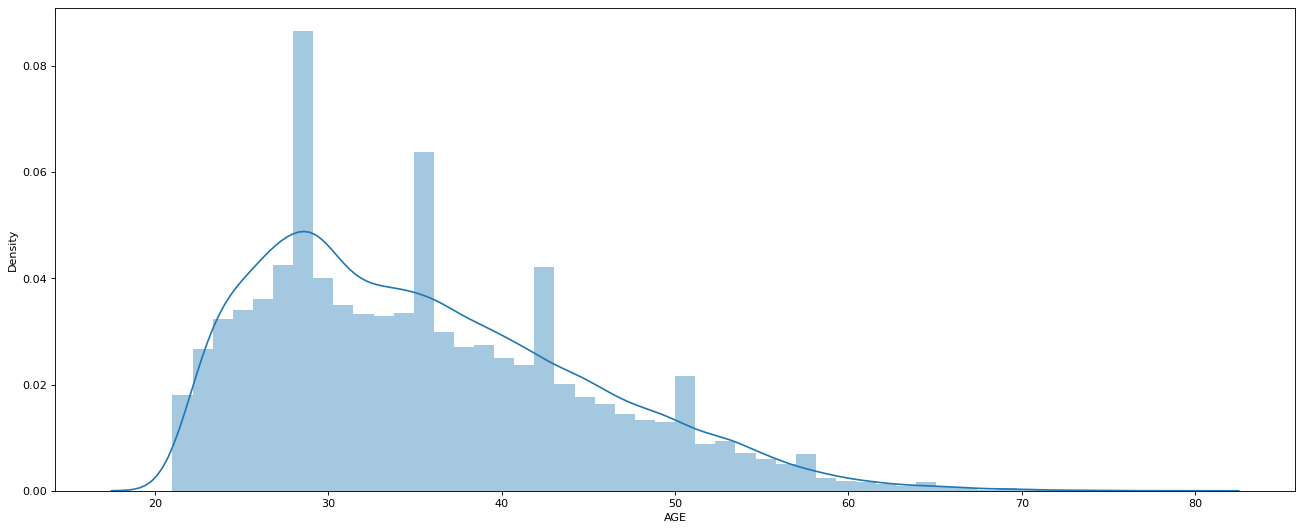

In [48]:
## Age Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['AGE'])
plt.show()

In [49]:
age_bin = [20, 30, 40, 50, 60, df['AGE'].max()]
age_label = ['21-30 Years', '31-40 Years', '41-50 Years', '51-60 Years', '>61 Years']

df['AGE_GROUP'] = pd.cut(df['AGE'], bins = age_bin , labels = age_label)

# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

##### Initial Hypothesis 
- Age affect Customer's credit card default payment
- Sex affect Customer's credit card default payment
- Education affect Customer's credit card default payment
- Marriage Status affect Customer's credit card default payment
- Balance Limit affect Customer's credit card default payment

### CORELLATION ANALYSIS

In [50]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

### Association

In [51]:
df_aso = df.drop(columns=['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_CAT','EDUCATION_CAT', 'MARRIAGE_CAT', 'AGE_GROUP'])

In [52]:
df_aso.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,def_pay
1,2,2,1,2,2,-1,-1,-2,-2,1
2,2,2,2,-1,2,0,0,0,2,1
3,2,2,2,0,0,0,0,0,0,0
4,2,2,1,0,0,0,0,0,0,0
5,1,2,1,-1,0,-1,0,0,0,0


In [53]:
assoc_theils = []

for i in df_aso.columns:
    assoc = round(theils_u(df_aso['def_pay'], df[i]), 2)
    assoc_theils.append(assoc)

In [54]:
data_theils = pd.DataFrame(data = [assoc_theils], columns = df_aso.columns, index=['Exited'])

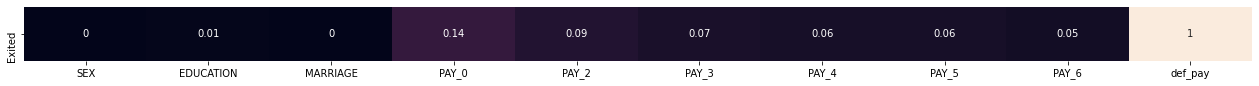

In [55]:
plt.figure(figsize=(22, 1))
sns.heatmap(data_theils, annot=True, cbar=False)
plt.show()

### Correlation Ratio

In [56]:
df_corat = df.drop(columns = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','SEX_CAT','EDUCATION_CAT', 'MARRIAGE_CAT', 'AGE_GROUP'])

In [57]:
df_corat.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [58]:
corat_list = []

for i in df_corat.columns:
    corat = round(correlation_ratio(df_corat['def_pay'], df[i]), 2)
    corat_list.append(corat)

In [59]:
data_corat = pd.DataFrame(data = [corat_list], columns = df_corat.columns, index=['Exited'])

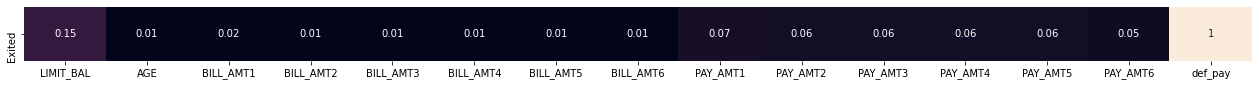

In [60]:
plt.figure(figsize=(22, 1))
sns.heatmap(data_corat, annot=True, cbar=False)
plt.show()

In [61]:
## To ensure corelation, further analysis will be conducted

### UNIVARIATE ANALYSIS

#### SEX

In [62]:
df['SEX_CAT'].value_counts()

Female    18112
Male      11888
Name: SEX_CAT, dtype: int64

In [63]:
df['SEX_CAT'].value_counts(normalize=True)

Female   0.60
Male     0.40
Name: SEX_CAT, dtype: float64

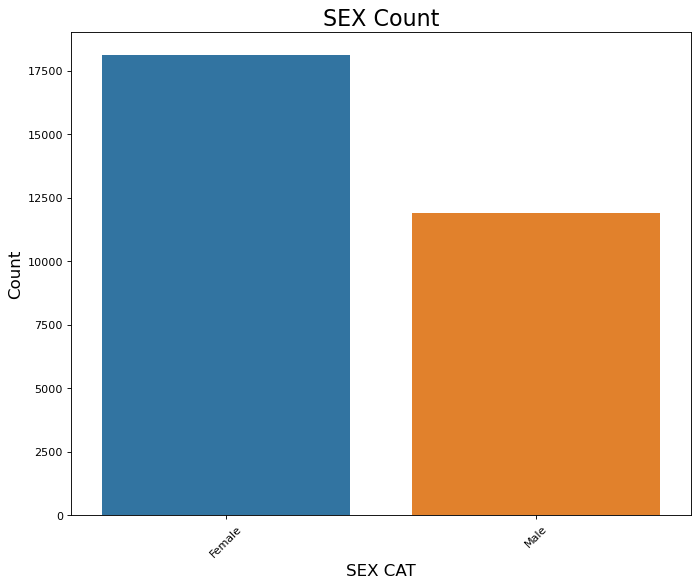

In [64]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['SEX_CAT'])
plt.title('SEX Count', size =20)
plt.xlabel("SEX CAT",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most of customers are female

#### EDUCATION

In [65]:
df['EDUCATION_CAT'].value_counts()

University         14030
Graduate School    10585
High School         4917
Others               468
Name: EDUCATION_CAT, dtype: int64

In [66]:
df['EDUCATION_CAT'].value_counts(normalize=True)

University        0.47
Graduate School   0.35
High School       0.16
Others            0.02
Name: EDUCATION_CAT, dtype: float64

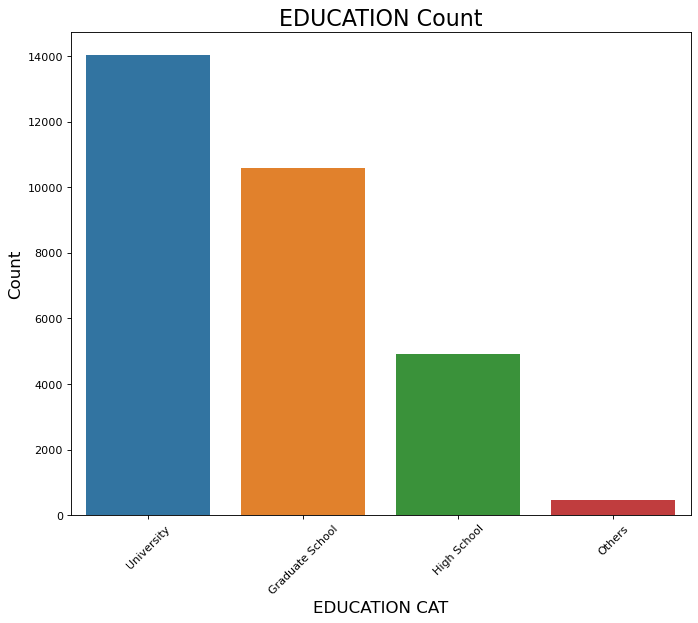

In [67]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['EDUCATION_CAT'])
plt.title('EDUCATION Count', size =20)
plt.xlabel("EDUCATION CAT",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most of customer's Education are University

#### MARRIAGE

In [68]:
df['MARRIAGE_CAT'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE_CAT, dtype: int64

In [69]:
df['MARRIAGE_CAT'].value_counts(normalize=True)

Single    0.53
Married   0.46
Others    0.01
Name: MARRIAGE_CAT, dtype: float64

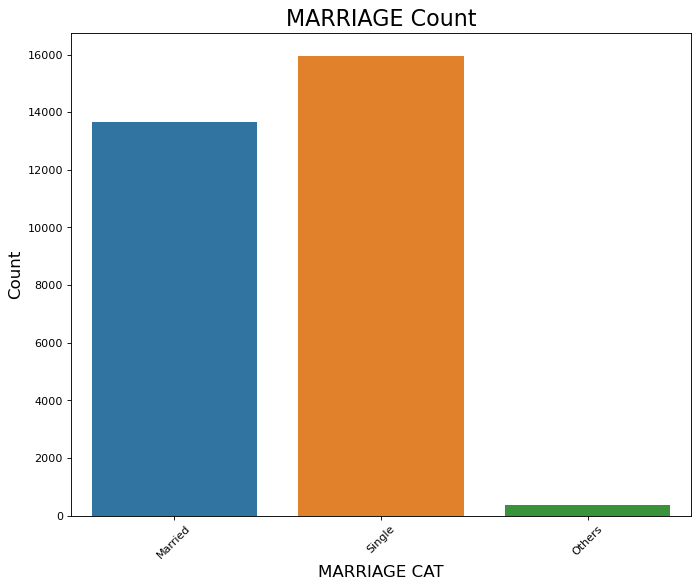

In [70]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['MARRIAGE_CAT'])
plt.title('MARRIAGE Count', size =20)
plt.xlabel("MARRIAGE CAT",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most of customers are Single

#### Age

In [71]:
df['AGE_GROUP'].value_counts()

21-30 Years    11013
31-40 Years    10713
41-50 Years     6005
51-60 Years     1997
>61 Years        272
Name: AGE_GROUP, dtype: int64

In [72]:
df['AGE_GROUP'].value_counts(normalize=True)

21-30 Years   0.37
31-40 Years   0.36
41-50 Years   0.20
51-60 Years   0.07
>61 Years     0.01
Name: AGE_GROUP, dtype: float64

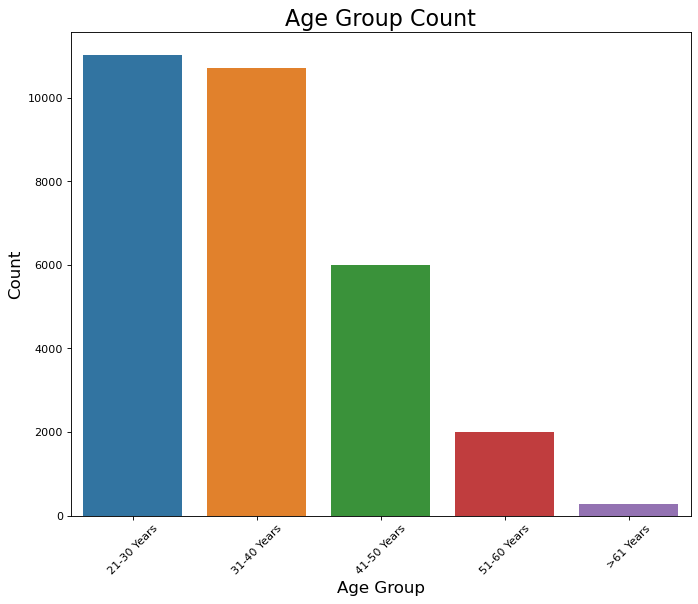

In [73]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['AGE_GROUP'])
plt.title('Age Group Count', size =20)
plt.xlabel("Age Group",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority customers are 21-30 AND 31-40 years old

#### BALANCE

#### Binning BALANCE

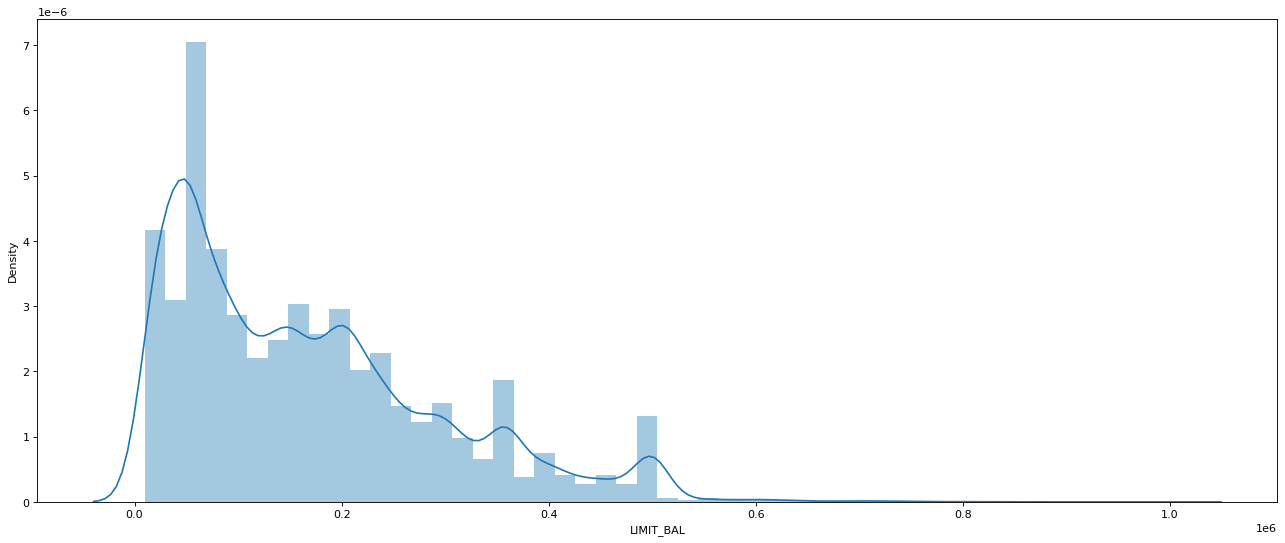

In [74]:
## Age Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['LIMIT_BAL'])
plt.show()

In [75]:
df['LIMIT_BAL'].min()

10000

In [76]:
df['LIMIT_BAL'].max()

1000000

In [77]:
limit_bin = [9000, 100000, 200000, 300000, 400000, 500000, df['LIMIT_BAL'].max()]
limit_label = ['10K-100K', '101K-200K', '201K-300K', '301K-400K', '401K-500K', '>501K']

df['LIMIT_GROUP'] = pd.cut(df['LIMIT_BAL'], bins = limit_bin  , labels = limit_label)

In [78]:
## ANALYSIS

In [79]:
df['LIMIT_GROUP'].value_counts()

10K-100K     12498
101K-200K     7880
201K-300K     5059
301K-400K     2759
401K-500K     1598
>501K          206
Name: LIMIT_GROUP, dtype: int64

In [80]:
df['LIMIT_GROUP'].value_counts(normalize=True)

10K-100K    0.42
101K-200K   0.26
201K-300K   0.17
301K-400K   0.09
401K-500K   0.05
>501K       0.01
Name: LIMIT_GROUP, dtype: float64

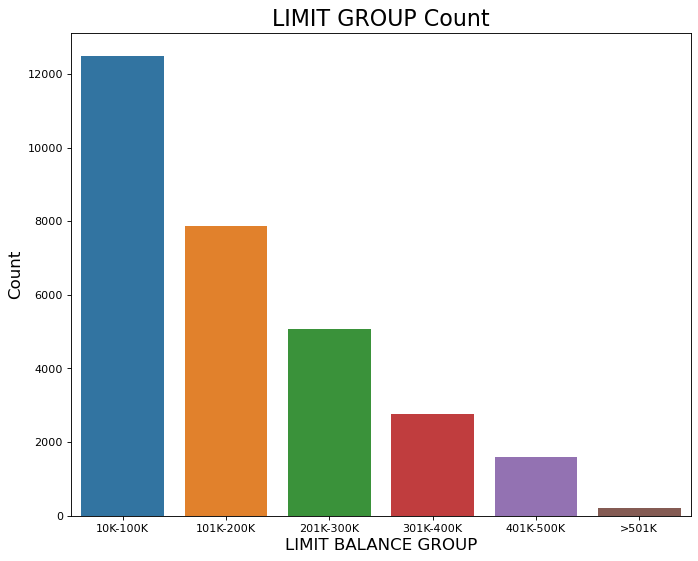

In [81]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['LIMIT_GROUP'])
plt.title('LIMIT GROUP Count', size =20)
plt.xlabel("LIMIT BALANCE GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority customer's LIMIT BALANCE are 10K-100K

#### DEFAULT

In [82]:
df['def_pay'].value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

In [83]:
df['def_pay'].value_counts(normalize=True)

0   0.78
1   0.22
Name: def_pay, dtype: float64

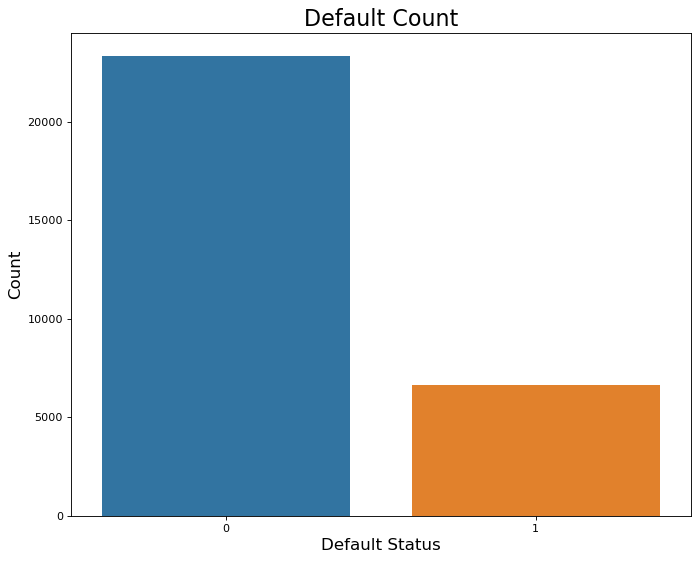

In [84]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['def_pay'])
plt.title('Default Count', size =20)
plt.xlabel("Default Status",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority customers don't have credit card default

### MULTIVARIATE ANALYSIS

#### Sex VS Credit Card Default

In [85]:
df_sex = df.pivot_table(index='SEX_CAT', values='def_pay', aggfunc='sum').sort_values('def_pay', ascending = False).reset_index()
df_sex

,SEX_CAT,def_pay
0,Female,3763
1,Male,2873


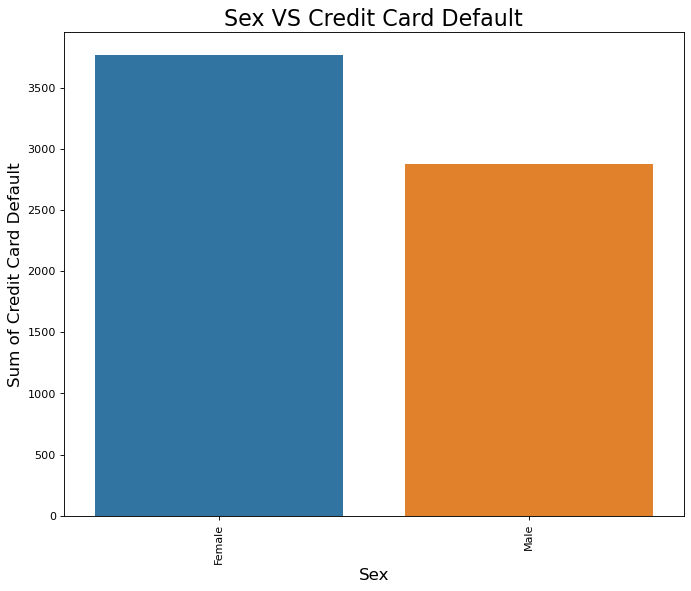

In [86]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEX_CAT' , y = 'def_pay', data = df_sex, estimator=sum)
plt.title('Sex VS Credit Card Default', size =20)
plt.xlabel("Sex", size = 15)
plt.ylabel("Sum of Credit Card Default", size = 15)
plt.xticks(rotation=90)
plt.show()

In [87]:
pd.crosstab(index = df['SEX_CAT'], columns = df['def_pay'], normalize = 'index')

def_pay,0,1
SEX_CAT,,
Female,0.79,0.21
Male,0.76,0.24


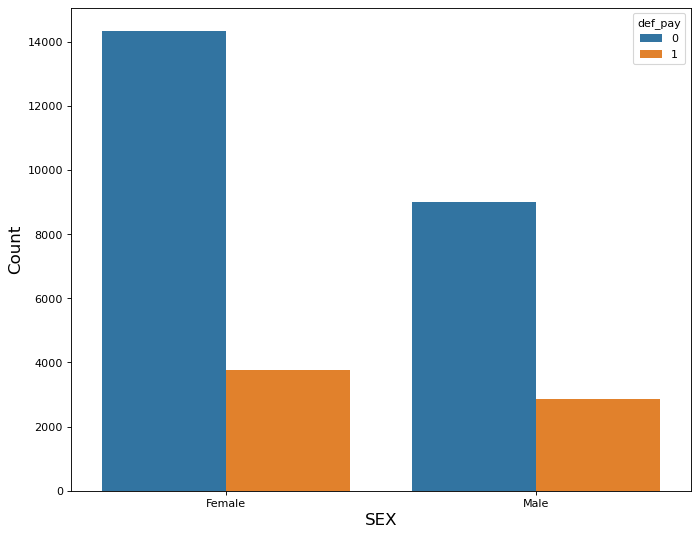

In [88]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('SEX_CAT', data = df, hue = 'def_pay')
plt.xlabel("SEX",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Customers whose gender are Female have more Credit Card Default
- Male and Female Customers have similar percentage Credit Card Default

#### Education VS Credit Card Default

In [89]:
df_ed = df.pivot_table(index='EDUCATION_CAT', values='def_pay', aggfunc='sum').sort_values('def_pay', ascending = False).reset_index()
df_ed

,EDUCATION_CAT,def_pay
0,University,3330
1,Graduate School,2036
2,High School,1237
3,Others,33


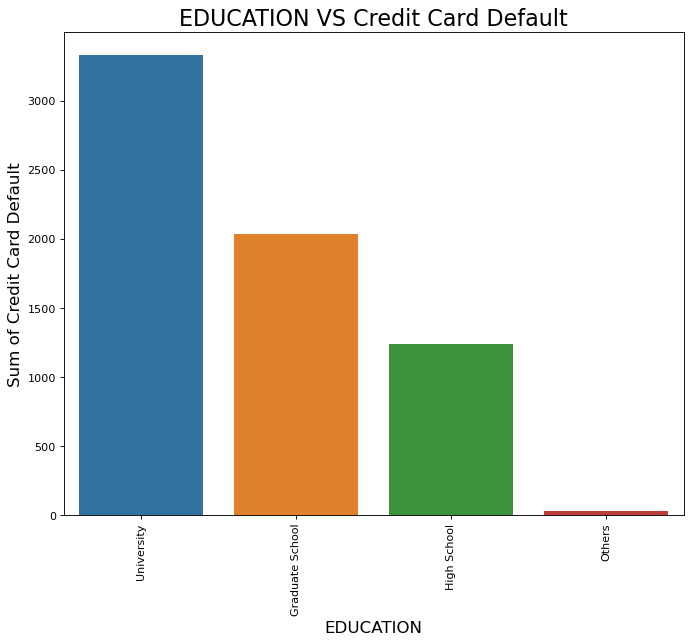

In [90]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'EDUCATION_CAT' , y = 'def_pay', data = df_ed, estimator=sum)
plt.title('EDUCATION VS Credit Card Default', size =20)
plt.xlabel("EDUCATION", size = 15)
plt.ylabel("Sum of Credit Card Default", size = 15)
plt.xticks(rotation=90)
plt.show()

In [91]:
pd.crosstab(index = df['EDUCATION_CAT'], columns = df['def_pay'], normalize = 'index')

def_pay,0,1
EDUCATION_CAT,,
Graduate School,0.81,0.19
High School,0.75,0.25
Others,0.93,0.07
University,0.76,0.24


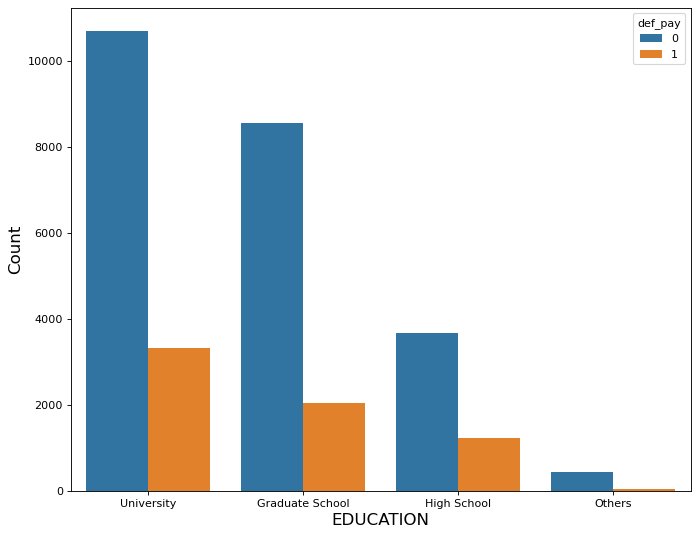

In [92]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('EDUCATION_CAT', data = df, hue = 'def_pay')
plt.xlabel("EDUCATION",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Customers whose Education is University have more Credit Card Default
- University, Graduate School, and High Scholl Customers have similar percentage Credit Card Default
- Others Education have the smaller percentage of Credit Card Default

#### Marriage VS Credit Card Default

In [93]:
df_mar = df.pivot_table(index='MARRIAGE_CAT', values='def_pay', aggfunc='sum').sort_values('def_pay', ascending = False).reset_index()
df_mar

,MARRIAGE_CAT,def_pay
0,Single,3341
1,Married,3206
2,Others,89


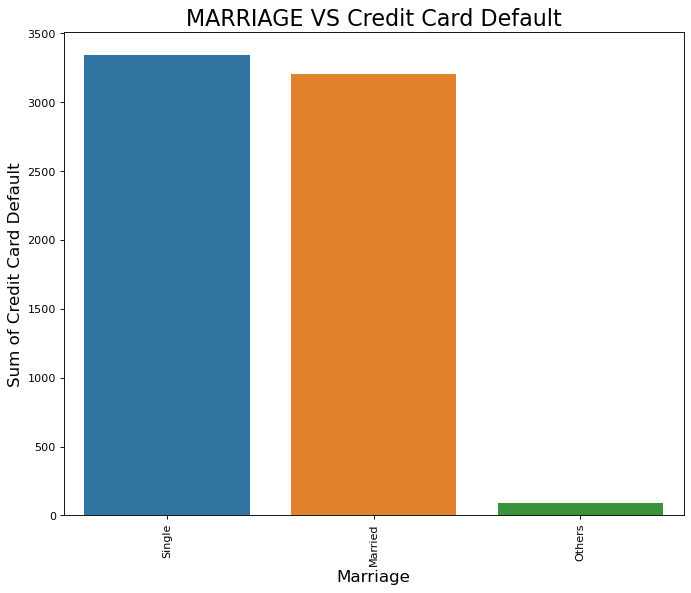

In [94]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'MARRIAGE_CAT' , y = 'def_pay', data = df_mar, estimator=sum)
plt.title('MARRIAGE VS Credit Card Default', size =20)
plt.xlabel("Marriage", size = 15)
plt.ylabel("Sum of Credit Card Default", size = 15)
plt.xticks(rotation=90)
plt.show()

In [95]:
pd.crosstab(index = df['MARRIAGE_CAT'], columns = df['def_pay'], normalize = 'index')

def_pay,0,1
MARRIAGE_CAT,,
Married,0.77,0.23
Others,0.76,0.24
Single,0.79,0.21


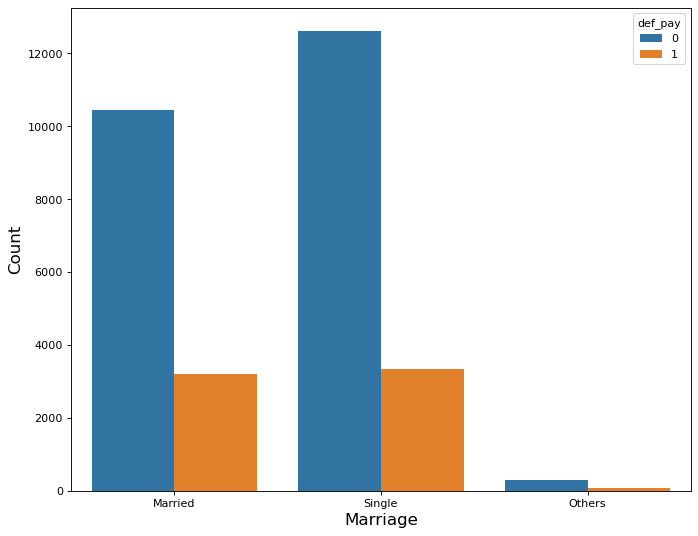

In [96]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('MARRIAGE_CAT', data = df, hue = 'def_pay')
plt.xlabel("Marriage", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Single Customers have more Credit Card Default
- Single, Married, and Others Customers have similar percentage Credit Card Default

#### Limit Group VS Credit Card Default

In [97]:
df_lim = df.pivot_table(index='LIMIT_GROUP', values='def_pay', aggfunc='sum').sort_values('def_pay', ascending = False).reset_index()
df_lim

,LIMIT_GROUP,def_pay
0,10K-100K,3684
1,101K-200K,1535
2,201K-300K,812
3,301K-400K,388
4,401K-500K,194
5,>501K,23


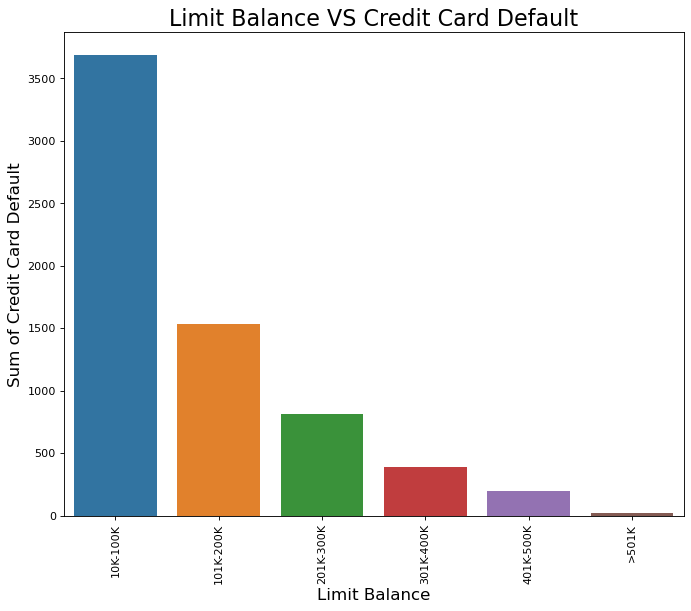

In [98]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'LIMIT_GROUP' , y = 'def_pay', data = df_lim, estimator=sum)
plt.title('Limit Balance VS Credit Card Default', size =20)
plt.xlabel("Limit Balance", size = 15)
plt.ylabel("Sum of Credit Card Default", size = 15)
plt.xticks(rotation=90)
plt.show()

In [99]:
pd.crosstab(index = df['LIMIT_GROUP'], columns = df['def_pay'], normalize = 'index')

def_pay,0,1
LIMIT_GROUP,,
10K-100K,0.71,0.29
101K-200K,0.81,0.19
201K-300K,0.84,0.16
301K-400K,0.86,0.14
401K-500K,0.88,0.12
>501K,0.89,0.11


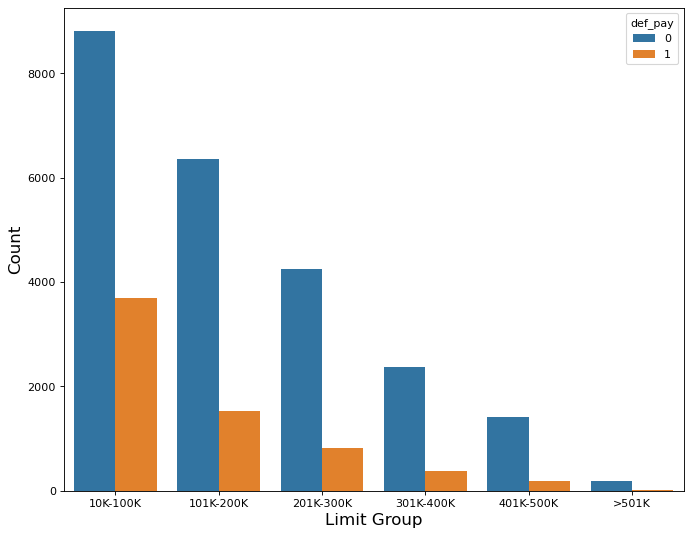

In [100]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('LIMIT_GROUP', data = df, hue = 'def_pay')
plt.xlabel("Limit Group", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Customers whose Credit Card Limit 10 - 100K  have more Credit Card Default
- Credit Card Limit 10-100K have the biggest percentage Credit Card Default

#### Age Group VS Credit Card Default

In [101]:
df_age = df.pivot_table(index='AGE_GROUP', values='def_pay', aggfunc='sum').sort_values('def_pay', ascending = False).reset_index()
df_age

,AGE_GROUP,def_pay
0,21-30 Years,2471
1,31-40 Years,2189
2,41-50 Years,1399
3,51-60 Years,504
4,>61 Years,73


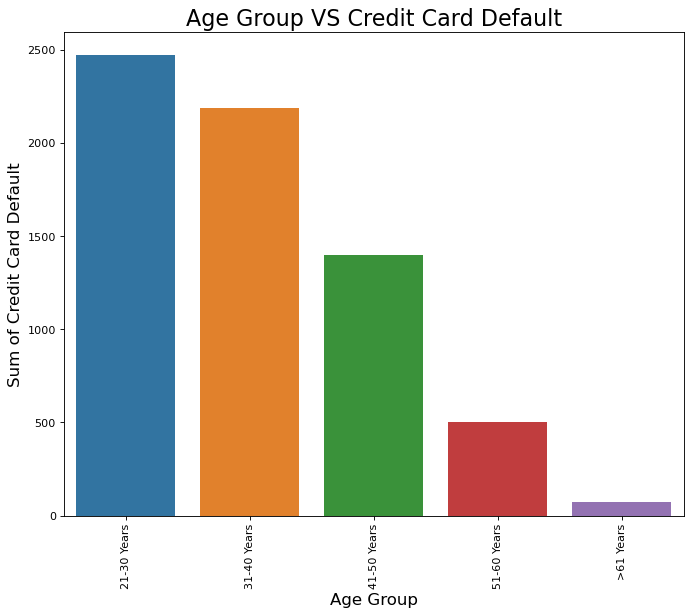

In [102]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'AGE_GROUP' , y = 'def_pay', data = df_age, estimator=sum)
plt.title('Age Group VS Credit Card Default', size =20)
plt.xlabel("Age Group", size = 15)
plt.ylabel("Sum of Credit Card Default", size = 15)
plt.xticks(rotation=90)
plt.show()

In [103]:
pd.crosstab(index = df['AGE_GROUP'], columns = df['def_pay'], normalize = 'index')

def_pay,0,1
AGE_GROUP,,
21-30 Years,0.78,0.22
31-40 Years,0.80,0.20
41-50 Years,0.77,0.23
51-60 Years,0.75,0.25
>61 Years,0.73,0.27


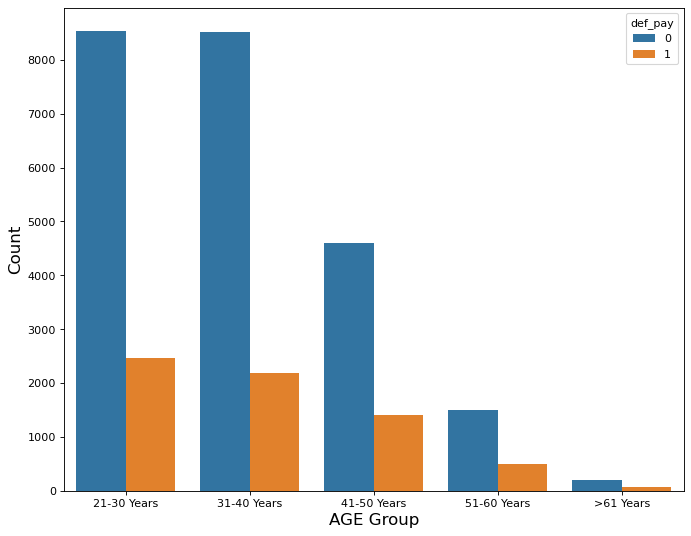

In [104]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('AGE_GROUP', data = df, hue = 'def_pay')
plt.xlabel("AGE Group", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Customers whose Age is 21-30 years old have more Credit Card Default
- Customers whose Age > 61 years old  have the biggest percentage Credit Card Default

#### PAYMENT STATUS vs Credit Card Default

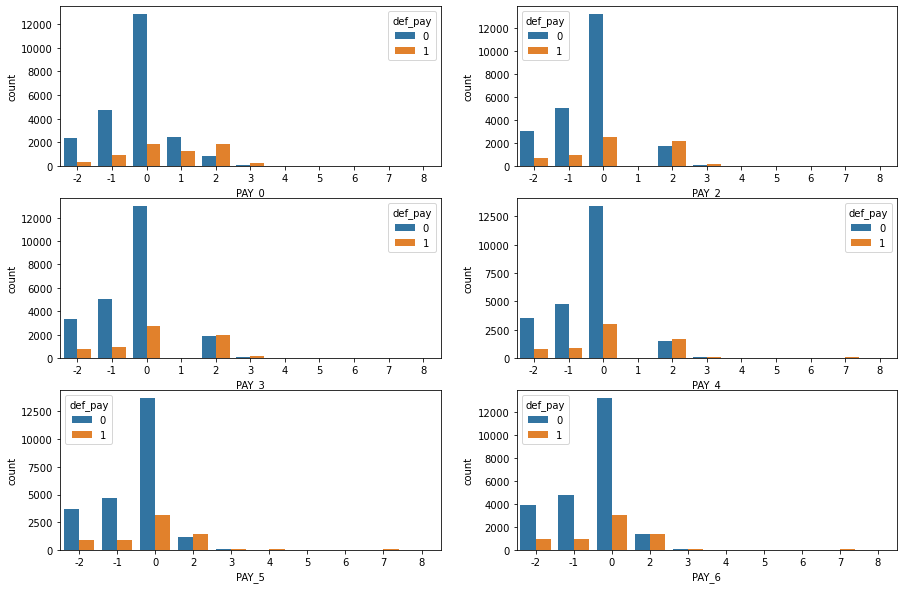

In [105]:
fig,axes = plt.subplots(ncols=2,nrows=3,figsize=(15,10))
sns.countplot(x = 'PAY_0',hue = 'def_pay',data=df,ax = axes[0][0])
sns.countplot(x = 'PAY_2',hue = 'def_pay',data=df,ax = axes[0][1])
sns.countplot(x = 'PAY_3',hue = 'def_pay',data=df,ax = axes[1][0])
sns.countplot(x = 'PAY_4',hue = 'def_pay',data=df,ax = axes[1][1])
sns.countplot(x = 'PAY_5',hue = 'def_pay',data=df,ax = axes[2][0])
sns.countplot(x = 'PAY_6',hue = 'def_pay',data=df,ax = axes[2][1])
plt.show()

- Higher delay month payment for credit card, higher percentage customer's credit card default

# DATA INSIGHT

- Most of customers are female
- Most of customer's Education are University
- Most of customers are Single
- Majority customers are 21-30 AND 31-40 years old
- Majority customer's LIMIT BALANCE are 10K-100K
- Majority customers don't have credit card default
- Customers whose gender are Female have more Credit Card Default
- Male and Female Customers have similar percentage Credit Card Default
- Customers whose Education is University have more Credit Card Default
- University, Graduate School, and High Scholl Customers have similar percentage Credit Card Default
- Others Education have the smaller percentage of Credit Card Default
- Single Customers have more Credit Card Default
- Single, Married, and Others Customers have similar percentage Credit Card Default
- Customers whose Credit Card Limit 10 - 100K  have more Credit Card Default
- Credit Card Limit 10-100K have the biggest percentage Credit Card Default
- Customers whose Age is 21-30 years old have more Credit Card Default
- Customers whose Age > 61 years old  have the biggest percentage Credit Card Default
- Higher delay month payment for credit card, higher percentage customer's credit card default

# SUMMARY & RECOMMENDATION

- Take more effort on monitoring and filtering customers whose credit card limit 10 - 100K
- Take more effort on monitoring and filtering customers whose age > 61 years old
- Create countermeasures strategy if customers have delay payment more than 2 months
- Create preventive default strategy for female single customers

For Machine Learning
- Consider to remove Gender features
- Consider to remove Marriage features

In [106]:
df.to_csv('CreditCardClean.csv',index=False)

In [107]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,SEX_CAT,EDUCATION_CAT,MARRIAGE_CAT,AGE_GROUP,LIMIT_GROUP
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,Female,University,Married,21-30 Years,10K-100K
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,Female,University,Single,21-30 Years,101K-200K
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,Female,University,Single,31-40 Years,10K-100K
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,Female,University,Married,31-40 Years,10K-100K
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,Male,University,Married,51-60 Years,10K-100K
